# Systems biology introduction
***

## Background

Systems biology is the computational and mathematical analysis and modeling of complex biological systems. It is a biology-based interdisciplinary field of study that focuses on complex interactions within biological systems, using a holistic approach (holism instead of the more traditional reductionism) to biological research. Particularly from the year 2000 onwards, the concept has been used widely in biology in a variety of contexts. The Human Genome Project is an example of applied systems thinking in biology which has led to new, collaborative ways of working on problems in the biological field of genetics. One of the aims of systems biology is to model and discover emergent properties, properties of cells, tissues and organisms functioning as a system whose theoretical description is only possible using techniques of systems biology. These typically involve metabolic networks or cell signaling networks.

<figure>
    <img src="Figures/Genomics_GTL_Pictorial_Program.jpg" width="800">
    <figcaption>An illustration of the systems approach to biology (<a href='https://upload.wikimedia.org/wikipedia/commons/0/01/Genomics_GTL_Pictorial_Program.jpg'>wikipedia</a>).</figcaption>
</figure>

In this project, the process of modelling an industrial batch fermentation process is simulated. In this example, simple monod kinetics equations will be used:
<figure>
    <img src="Figures/Equations.png" width="300">
    <figcaption>Equations used in the monod kinetics.</figcaption>
</figure>

| Parameter       | Description                                  |
|-----------------|----------------------------------------------|
| µ<sub>max</sub> | maximal specific growth rate [h<sup>-1</sup> |
| c<sub>s</sub>   | Concentration of limiting substrate [g/L]    |
| K<sub>s</sub>   | half-velocity constant [g/L]                 |
| Y<sub>x</sub>   | Yield coefficient Substrate to biomass [g/g] |
| k<sub>1</sub>   | Production rate (not growth-coupled [-]      |

The experimental work in your biotech company is highly automated: you are setting the parameters of the experiments and focus on computational data analysis. The goal is to find a suitable process model to describe the production of biomass and product levels. To achieve this goal, virtual experiments have to be performed to look for fitting model parameters.

Can you find the best parameters faster than the optimizing algorithm?

## Workflow

**1 Set-up of simulation environment**

**2 Model setup**
 
 * *2.1 Choose your host organism*
 * *2.2 Choose Equipment investment*
 
**3 Culture characterization**
 
 * *3.1 Experiment set-up*     
 * *3.2 Data analysis growth experiment*    

**4 Promoter sequence selection**
 * *4.1 Promoter and expression experiments*
 * *4.2 Data analysis of promoter strength*

**5 Evaluation by cross-group integration**

## 1 Set-up of simulation environment
Loading libraries and fixing visualization. No user input necessary.

In [10]:
# Loading of important functionalities for the notebook:
# Loading numpy, a library fo manipulation of numbers:
import os
import numpy as np
# Loading matplotlib, a library for visualization:
import matplotlib.pyplot as plt
# Initialization, loading of all laboratory functionalities and stored models and information of the organisms:
from FermProSimFun import MonodModel as Model

print('System ready')

System ready


## 2 Model setup

In this stage, you initialize a monod-like model for your bioprocess. Random values will be chosen for the initial kinetic parameters. They are displayed as a dictionary.
Default values are in the following range:

| Parameter       | Value range |
|-----------------|-------------|
| µ<sub>max</sub> | 0.5 - 1.1   |
| K<sub>s</sub>   | 7 - 10      |
| Y<sub>x</sub>   | 0.4 - 0.6   |
| k<sub>1</sub>   | 0.05 - 0.2  |


In [11]:
mymodel = Model()

# Model parameters are displayed:
print(mymodel)

Monod_Model instance for a E. coli-batch microbial production process. 
Current parameters: {'u0': 0, 'umax': 0.88, 'duration': 24, 'Ks': 9.7, 'Yx': 0.468, 'k1': 0.085}


### 2.1  Calculate and visualize initial model results
Until now, the model is initialized but didnt perform a calculation yet. In order to check the model results, the calculate_monod() function has to be called.
Afterwards, the results can be visualized in a simple plot.

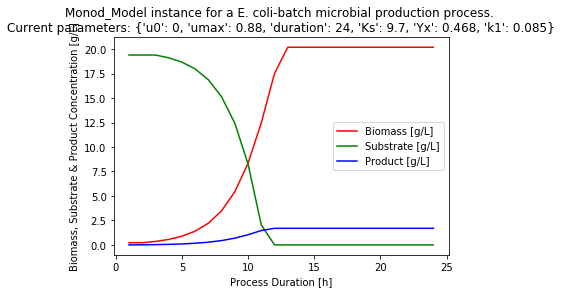

<module 'matplotlib.pyplot' from 'C:\\Users\\Jonat\\PycharmProjects\\FermProSim\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
mymodel.calculate_monod()
mymodel.plot_results()

Congratulations, you calculated your first kinetic model! Take a moment and check out the typical batch growth phase of a bioprocess.

## 3 Culture characterization

### 3.1  Strain analysis experiments
Imagine, you start working with a new strain of *E. coli* and don't know the growth characteristics of it yet. To start simulating realistic values, you first need to fit your kinetic parameters to some measurements from the lab.

Here, you can perform "calibration experiments" and measure at certain time_points the actual behaviour of your new strain.
Compare the results to the model results you obtained so far. You probably are far off. Therefore, you have to change your kinetic parameters to more realistic values, in order to minimize the modeling error.

To calculate the distance between real and calculated values, we often use the root-mean-square-error (RMSE) as a metric.
The formula for the RMSE is as follows, with N = number of samples, $\hat{y_{i}}$ as the calculated value for our target variable and y<sub>i</sub> as our measurement:

$$RMSE = \sqrt {\frac{1}{N} \sum_{i=1}^{N} (\hat{y_{i}} - y_{i})^2}$$

To save our experiment results, we can give an experiment ID to the cultivation, so we can find our results with this ID afterwards.

Example: `result_path = mymodel.offline_samples(experiments_ID=10)`

**Input:**
* **`experiments_ID`: variable name (integer)**

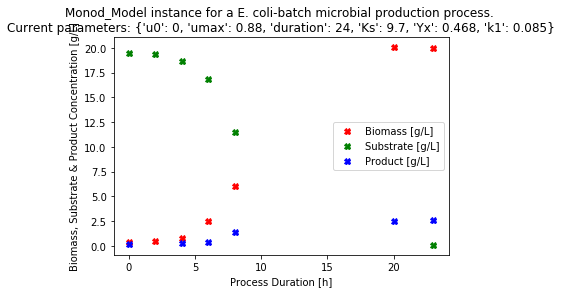

            X          S         P
0    0.423046  19.464578  0.205907
2    0.464904  19.383363       NaN
4    0.803528  18.652639  0.324513
6    2.486779  16.797381  0.425524
8    6.072227  11.539153  1.368233
20  20.051434        NaN  2.491182
23  19.953377   0.096844  2.653959


In [13]:
# User input is required in the following code lines:
# If you want to change the experiemnts_ID, replace 10 with another number. If this is not the case, no user input is required here.
experiments_ID = 10 # Definition of an ID for the set of experiments

# No user input necessary in all subsequent lines of code:
result_path = mymodel.offline_samples(experiments_ID=experiments_ID)
offline_samples = mymodel.load_offline_values(result_path)

# The measurements are displayed here:
print(offline_samples)

### 3.2 Offline data analysis

The data of the experiment was stored in a comma-separated-value (`csv`) file in the local adress.
Unfortunately, you dont get measurement values for the whole process duration. Sorry, even the best lab assistant needs to sleep sometimes ;)

Your first instinct is probably to perform a linear regression of your sample data. To do this, simply call 'mymodel.plot_linear_fit(offline_samples)'.
The error between the linear fit of the real data and the actual biological behaviour of your strain is computed automatically and printed in the title.


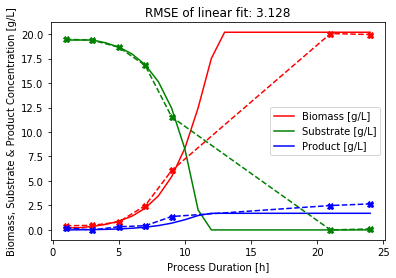

In [14]:
mymodel.plot_linear_fit(offline_samples)

### 3.3 Manual fitting of the model

As you probably expected, the linear fit of our samples doesn't really look like a biological process, especially if there aren't many samples.
Thankfully, we can reach a better model with our monod kinetics. Now, it's finally time to find out more feasible model parameters.
But first, you have to bring these steps in the right order:

* Plot results                  ('mymodel.plot_results(offline_results=offline_samples')
* Define new kinetic parameters ('param_list = [0.8, 8.5, 0.5, 0.1]')
* Calculate kinetics results    ('mymodel.calculate_monod()')
* Set model parameters          ('mymodel.set_params(param_list)')
* Calculate the rmse            ('rmse = mymodel.calc_rmse()')

**Input:**
* **`param_list`: List of kinetic parameters for monod model(float list), in order: µmax, Ks, Yx, k1**

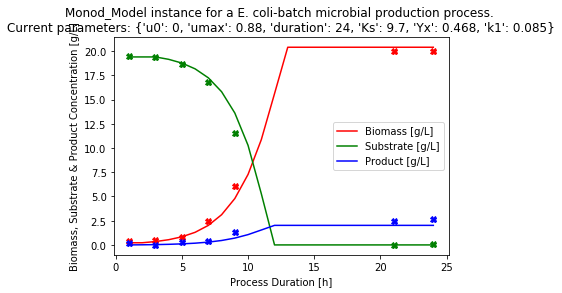

RMSE of the calculated kinetic in relation to real values is: 1.1408613876678368
Model parameters were changed 4 times.0 Experiments performed.


In [18]:
# param_list = µmax, Ks, Yx, k1

## Unscramble the following lines:
mymodel.plot_results(offline_results=offline_samples)
param_list = [0.8, 8.5, 0.5, 0.1]
mymodel.calculate_monod()
mymodel.set_params(param_list)
rmse = mymodel.calc_rmse()

## print out the rmse
print(f'RMSE of the calculated kinetic in relation to real values is: {round(rmse, 3)}')

### 3.3 Automated fitting of the model
Manually trying out combinations for kinetic parameters is not feasible for real-life problems. But with the right kinetic terms and experimental data, it can be possible to automatically fit them.
Therefore, a minimizing algorithm is used. This algorithm alters the kinetic parameters iteratively and calculates the RMSE (or other error metrics), until it reaches a global or local minimum, if possible.
Of course this doesn't mean that biologists are out of work now: We still need to set biological lower and upper bounds for our kinetic parameters, because the minimizing algorithm has no biological understanding at all.
Check out, how many iterations the algorithm needs to find the correct kinetic parameters.

In [ ]:
param_list = [0.8, 8.5, 0.5, 0.1]   # Starting values for optimization
optim_params = mymodel.fit_model(param_list)
mymodel.set_params(optim_params)
optim_results = mymodel.calculate_monod()
rmse_after_optim = round(mymodel.calc_rmse(), 3)
mymodel.plot_results(offline_results=offline_samples)
print(f'RMSE after optimization of kinetic parameters: {rmse_after_optim}.')


### 4.1 Using the optimized model

After all this parameter fitting, it is time to put our finalized process model to use! Suppose we want to reach a certain biomass concentration at the end of our batch phase.
We don't want too many cells, because then we will quickly run out of oxygen in the process and substrate is costly, but we also don't want too little because then our production is too slow.

To find out the desired biomass for your process, call 'mymodel.get_optimal_X()'.
To find out how much biomass you currently produce with your process, call 'mymodel.get_max_biomass()'.

In order to achieve more biomass, you probably need to supply more starting substrate or inoculum to your process.
Try to find the best combination of starting substrate in your media and starting biomass concentration, using 'mymodel.set_conditions(conditions_list)'

| Parameter     | Value range |
|---------------|-------------|
| S<sub>0</sub> | 15 - 30     |
| X<sub>0</sub> | 0.05 - 0.3  |


**Input:**
* **`conditions_list`: List of starting conditions for your process (float list) in order: S0, X0**

In [ ]:
mymodel.get_optimal_X()

# conditions_list = S0, X0
conditions_list = [20, 0.1]
mymodel.set_conditions(conditions_list)
mymodel.calculate_monod()
max_biomass = mymodel.get_max_biomass()

Great, you found hints for the optimal media composition using your monod-kinetics model.
This is just the tip of the iceberg! Models are useful for many applications, like design of experiments, automated process control or quality management.
